In [1335]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import elephant
from neo.core import SpikeTrain
from quantities import s,ms
from viziphant.rasterplot import rasterplot
from tools import *
from collections import defaultdict

In [1336]:
pattern_size=0.5

In [1337]:
def spikes_around_patterns(student_times,start):
    signal_times = np.loadtxt("pattern_times").T[0]
    times_from_pat = SpikesDistFromPat(np.array(student_times), pattern_size, signal_times, window=pattern_size*2, offset=pattern_size/2)
    all_spike_pat = []
    for i in range(len(times_from_pat[0])):
        if times_from_pat[0][i] > start:
            all_spike_pat.append(times_from_pat[1][i])

    all_spike_pat.sort()
    return all_spike_pat

In [1338]:
signal_times = np.loadtxt("pattern_times").T[0]

In [1339]:
signal_times

array([  4.867438,  27.333096,  45.305835,  67.563948,  79.648339,
        84.090817,  86.663651, 103.318308, 122.150059, 125.406781,
       129.150587, 140.74126 , 144.52232 , 148.485686, 152.217949,
       154.024456, 162.389861, 164.309158, 166.262493, 172.363736,
       179.641891, 181.252851, 183.788385, 188.253175])

In [1340]:
all_spikes = np.loadtxt("spiketrains_0_input_pattern")

In [1341]:
spikes_in_pat = defaultdict(list)
for tpl in all_spikes:
    if tpl[0]>signal_times[0]:
        if tpl[0]>signal_times[0]+pattern_size:
            break
        spikes_in_pat[tpl[1]].append(tpl[0]-signal_times[0])

In [1342]:
student_indexes=np.loadtxt("data_conso/spikes_student_index.data")
student_times=np.loadtxt("data_conso/spikes_student_times.data")
teachers_indexes=np.loadtxt("data_conso/spikes_teachers_index.data")
teachers_times=np.loadtxt("data_conso/spikes_teachers_times.data")
conso_times=np.loadtxt("data_conso/conso_spikes.data")

In [1343]:
weight_in_time = []
for i in range(100):
    weight_in_time.append(np.loadtxt("data_conso/syn_w_input_student_"+str(i)+".data"))
weight_in_time= np.array(weight_in_time)

In [1344]:
weight_in_time_conso = []
for i in range(200):
    weight_in_time_conso.append(np.loadtxt("data_conso/syn_w_input_conso_"+str(i)+".data"))
weight_in_time_conso= np.array(weight_in_time_conso)

In [1345]:
np.mean(weight_in_time.T[-1])

0.5574709040585646

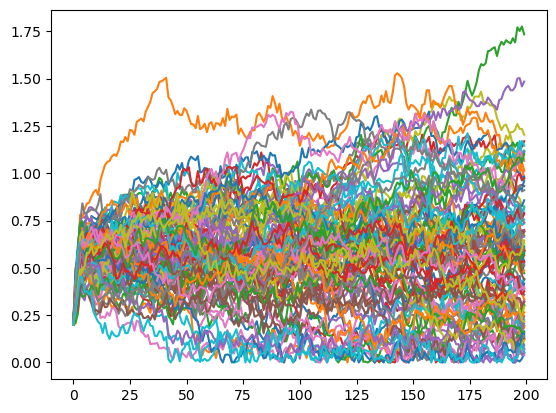

In [1346]:
plt.plot(weight_in_time.T);

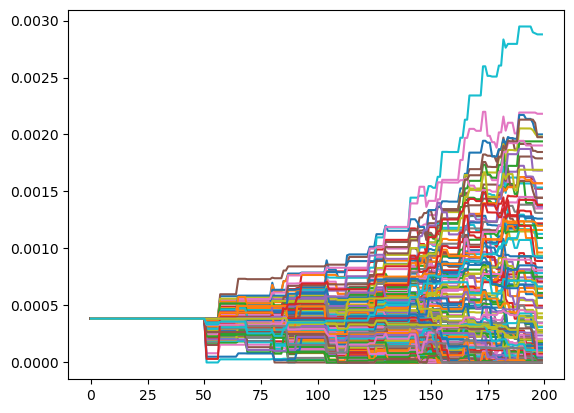

In [1347]:
plt.plot(weight_in_time_conso.T);

In [1348]:
source_input_conso = np.loadtxt("data_conso/syn_source_input_conso.data")

In [1349]:
weight_in_time_conso[:,-1];

In [1350]:
spikes_in_pat[5]

[0.024005999999999972,
 0.22345799999999993,
 0.3611599999999999,
 0.4546770000000002]

In [1351]:
all_psth_pat = []
for i in range(200):
    all_psth_pat.append(np.zeros(30))
    spikes_neuron = np.array(spikes_in_pat[source_input_conso[i]])
    indexes_psth = ((spikes_neuron/pattern_size)*30).astype(int)
    all_psth_pat[-1][indexes_psth]+=1
all_psth_pat= np.array(all_psth_pat)

In [1352]:
all_psth_pat_weighted = (weight_in_time_conso[:,-1]*all_psth_pat.T).T

In [1353]:
hist =np.sum(all_psth_pat_weighted,axis =0)

<BarContainer object of 30 artists>

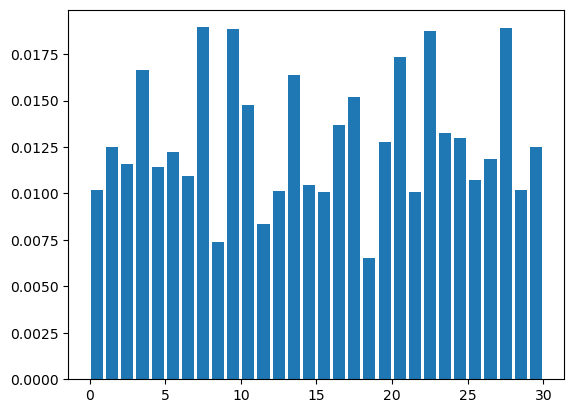

In [1354]:
plt.bar(np.array(list(range(30)))+0.5,hist)

In [1355]:
# data = np.loadtxt('spiketrains_0_input_pattern')
# spikes_in_pattern = []
# for i in data :
#     if signal_times[1]<i[0]<signal_times[1]+pattern_size:
#         spikes_in_pattern.append([i[0]-signal_times[1],i[1]])
#     if signal_times[1]+pattern_size<i[0]:
#         break
#spikes_in_pattern = np.array(spikes_in_pattern)
#spikes_in_pattern_to_learn = spikes_in_pattern[np.where(spikes_in_pattern[:,1]==0)[0]]

In [1356]:
#spikes_in_pattern_to_learn = spikes_in_pattern[np.where(spikes_in_pattern[:,1]==0)[0]]

In [1357]:
#plt.eventplot(spikes_in_pattern_to_learn[:,0])

In [1358]:
each_student_times = defaultdict(list)

for i in range(len(student_indexes)):
    index = student_indexes[i]
    each_student_times[index].append(student_times[i])
    

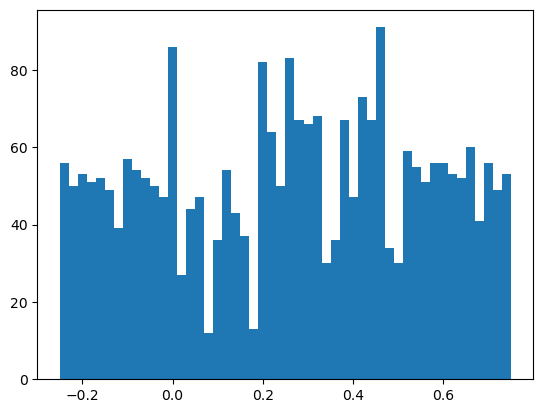

In [1359]:
all_spike_pat = spikes_around_patterns(each_student_times[7],100)
plt.hist(all_spike_pat, bins=50);

In [1360]:
max_time_spike = max(student_times)
spike_trains_neurons_students_neo=dict()
list_spike_trains_neurons_students_neo= []
for key in each_student_times:
    train = SpikeTrain(each_student_times[key]*s, t_stop=max_time_spike)
    spike_trains_neurons_students_neo[key] = train
    list_spike_trains_neurons_students_neo.append(train)

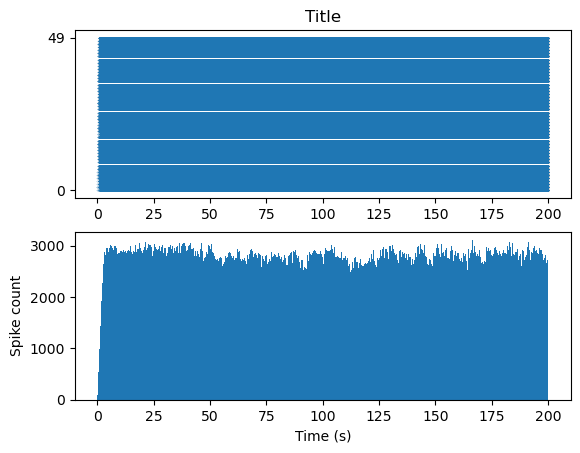

In [1361]:
axes = rasterplot(list_spike_trains_neurons_students_neo, histogram_bins=500, title='Title', s=0.01)
plt.show()

In [1362]:
len(teachers_times)

7920

In [1363]:
teacher_neo =SpikeTrain(teachers_times*s, t_stop=max(teachers_times))
conso_neo =SpikeTrain(conso_times*s, t_stop=max(conso_times))

In [1364]:
kernel = elephant.kernels.GaussianKernel(sigma=20 * ms)
rate_teacher = elephant.statistics.instantaneous_rate(teacher_neo,sampling_period=1 * ms,kernel=kernel)
rate_conso = elephant.statistics.instantaneous_rate(conso_neo,sampling_period=1 * ms,kernel=kernel)

In [1365]:
sync_detector =np.loadtxt("data_conso/sync_detector_voltage.data")
sync_detector_2 =np.loadtxt("data_conso/sync_detector_voltage_2.data")

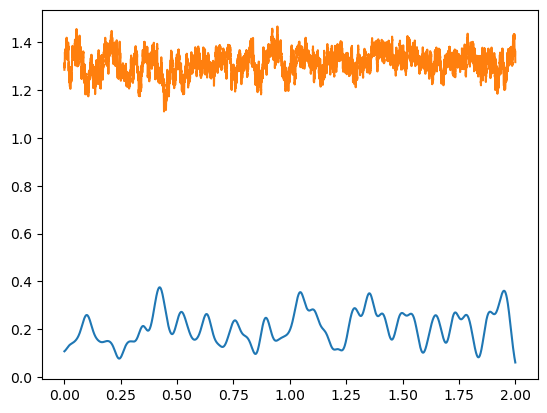

In [1366]:
plt.plot(np.linspace(0,2,2000),rate_teacher[-2000:]/200)
plt.plot(np.linspace(0,2,20000),sync_detector[-20000:])

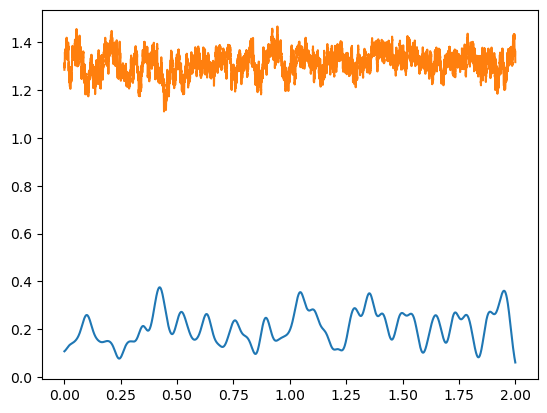

In [1367]:
plt.plot(np.linspace(0,2,2000),rate_teacher[-2000:]/200)
plt.plot(np.linspace(0,2,20000),sync_detector_2[-20000:])

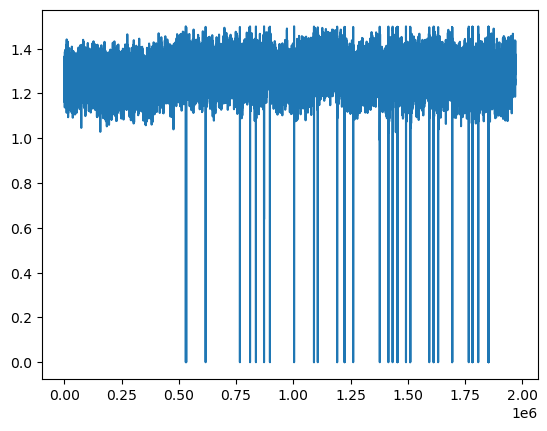

In [1368]:
plt.plot(sync_detector[30000:])

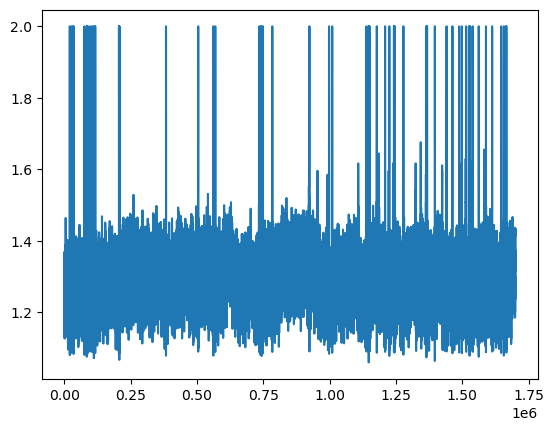

In [1369]:
plt.plot(sync_detector_2[300000:])

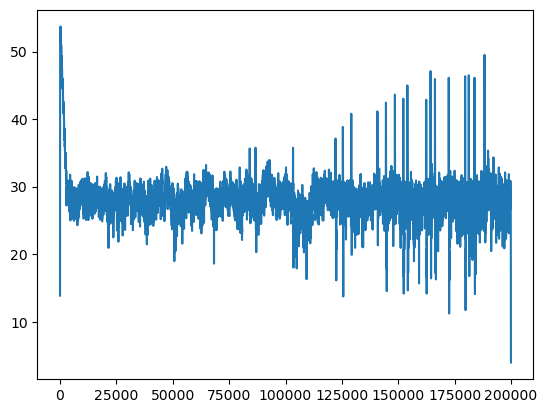

In [1370]:
plt.plot(rate_conso)

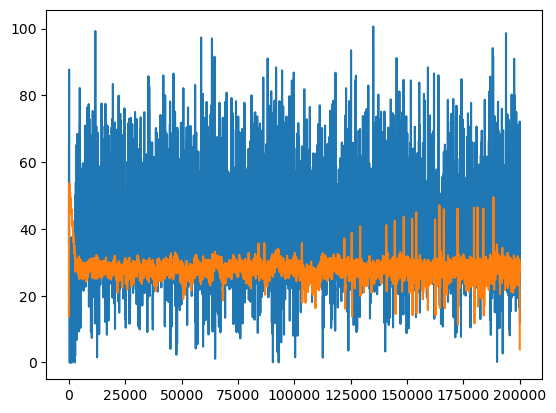

In [1371]:
plt.plot(rate_teacher)
plt.plot(rate_conso)

In [1372]:
signal_times = np.loadtxt("pattern_times").T[0]
signal_times_in = signal_times[np.where(signal_times<200)[0]]

In [1383]:
which_signal = -1

In [1384]:
pattern_size

0.5

In [1385]:
time_points_conso = np.linspace(0,200,200000)
window = pattern_size*2
sampling = 1000
pstc_conso = np.zeros(int(window*sampling))
time_frame_conso =np.linspace(0,window,int(window*sampling))-(window/2)+(pattern_size/2)

ti=0
ts_i=0
#for ts in signal_times[-20:] :
for ts in [signal_times[which_signal]] :
    ts_i+=1
    if ti<len(rate_conso):
        while time_points_conso[ti]<ts+(window/2)+(pattern_size/2):
            if ts-(window/2)+(pattern_size/2)<time_points_conso[ti]:
                moment = time_points_conso[ti]-ts
                #print(np.argmin(abs(time_frame-moment)))
                #print(moment)
                pstc_conso[np.argmin(abs(time_frame_conso-moment))]+=float(rate_conso[ti])
            if ti<len(rate_conso)-1:
                ti+=1
            else:
                break
    else :
        break
    print(ts_i)
    

1


In [1386]:
time_points_teacher = np.linspace(0,200,200000)
sampling = 1000
pstc_detector_teacher = np.zeros(int(window*sampling))
time_frame_teacher =np.linspace(-(window/2)+(pattern_size/2),(window/2)+(pattern_size/2),int(window*sampling))

rate_teacher_array =np.array(rate_teacher).flatten()
ti=0
ts_i=0
#for ts in signal_times[-20:] :
for ts in [signal_times[which_signal]] :
    ts_i+=1
    if ti<rate_teacher_array.size:

        while time_points_teacher[ti]<ts+(window/2)+(pattern_size/2):
            if ts-(window/2)+(pattern_size/2)<time_points_teacher[ti]:

                moment = time_points_teacher[ti]-ts
                #print(np.argmin(abs(time_frame-moment)))
                pstc_detector_teacher[np.argmin(abs(time_frame_teacher-moment))]+=rate_teacher_array[ti]
            if ti<rate_teacher_array.size-1:
                ti+=1
            else:
                break
    else :
        break
    print(ts_i)
    

1


In [1387]:
int(window*sampling)

1000

In [1388]:
time_points = np.linspace(0,200,2000000)
sampling = 10000
pstc_detector = np.zeros(int(window*sampling))
time_frame =np.linspace(-(window/2)+(pattern_size/2),(window/2)+(pattern_size/2),int(window*sampling))

ti=0
ts_i=0
#for ts in signal_times[-20:] :
for ts in [signal_times[which_signal]] :
    ts_i+=1
    if ti<len(sync_detector):
        while time_points[ti]<ts+(window/2)+(pattern_size/2):
            if ts-(window/2)+(pattern_size/2)<time_points[ti]:
                moment = time_points[ti]-ts
                #print(np.argmin(abs(time_frame-moment)))
                pstc_detector[np.argmin(abs(time_frame-moment))]+=sync_detector[ti]
            if ti<len(sync_detector)-1:
                ti+=1
            else:
                break
    else :
        break
    print(ts_i)
    

1


In [1389]:
time_points = np.linspace(0,200,2000000)
sampling = 10000
pstc_detector_2 = np.zeros(int(window*sampling))
time_frame =np.linspace(-(window/2)+(pattern_size/2),(window/2)+(pattern_size/2),int(window*sampling))

ti=0
ts_i=0
#for ts in signal_times[-20:] :
for ts in [signal_times[which_signal]] :
    ts_i+=1
    if ti<len(sync_detector_2):
        while time_points[ti]<ts+(window/2)+(pattern_size/2):
            if ts-(window/2)+(pattern_size/2)<time_points[ti]:
                moment = time_points[ti]-ts
                #print(np.argmin(abs(time_frame-moment)))
                pstc_detector_2[np.argmin(abs(time_frame-moment))]+=sync_detector_2[ti]
            if ti<len(sync_detector_2)-1:
                ti+=1
            else:
                break
    else :
        break
    print(ts_i)
    

1


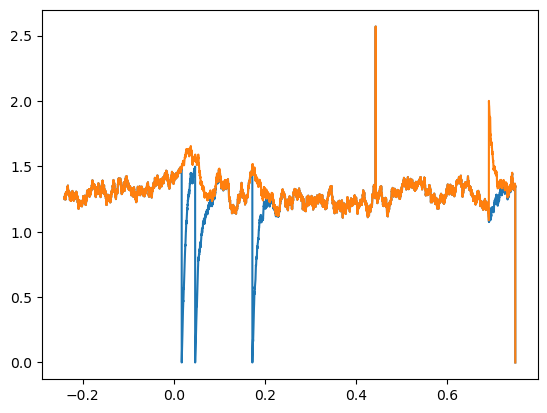

In [1390]:
plt.plot(time_frame[100:],pstc_detector[100:])
plt.plot(time_frame[100:],pstc_detector_2[100:])

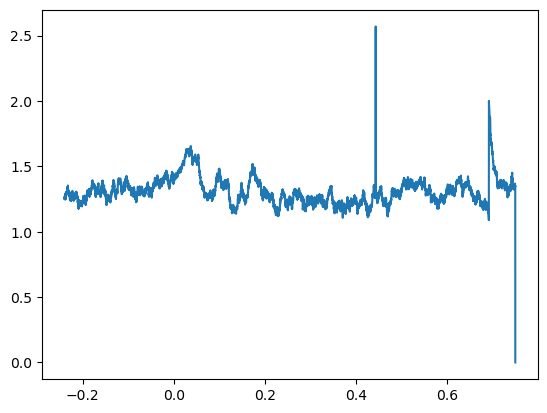

In [1391]:
plt.plot(time_frame[100:],pstc_detector_2[100:])

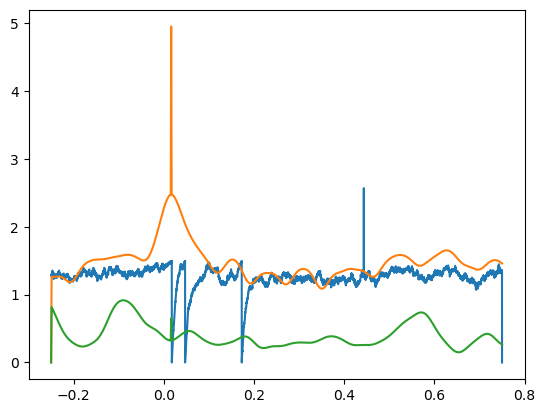

In [1392]:
plt.plot(time_frame,pstc_detector)
plt.plot(time_frame_conso,pstc_conso/20)
plt.plot(time_frame_teacher,pstc_detector_teacher/100)

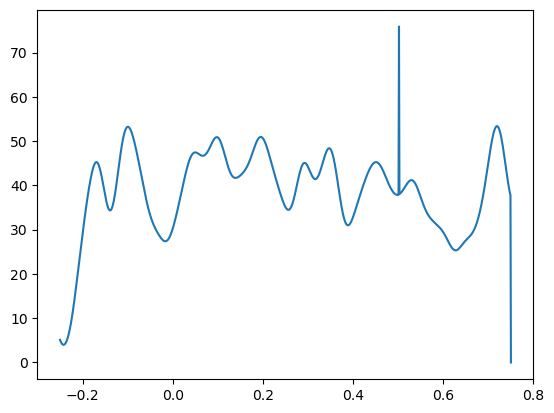

In [1332]:
plt.plot(time_frame_teacher,pstc_detector_teacher)

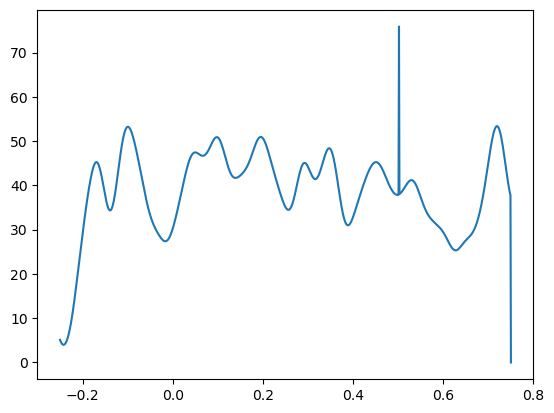

In [1333]:
plt.plot(time_frame_teacher,pstc_detector_teacher)

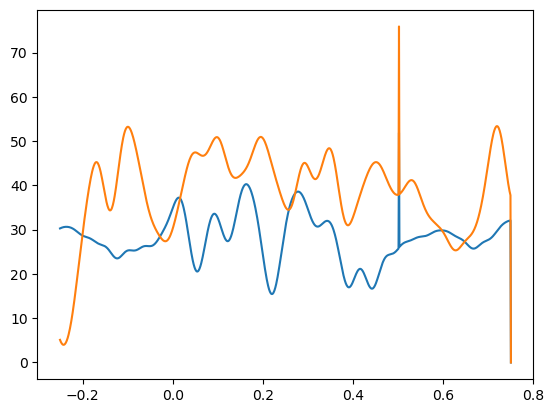

In [1334]:
plt.plot(time_frame_conso,pstc_conso)
plt.plot(time_frame_teacher,pstc_detector_teacher)